In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sheet 1 - Task 1


In [2]:
# Just an output method to save data to txt, not at all relevant for calculations
output = ("Auswertung")    
my_file = open(output + '.txt', "w")

def writeW(Wert,Beschreibung):
    my_file.write(str(Beschreibung))
    #my_file.write('\n')
    try:
        for i in Wert:
            my_file.write(str(i))
            my_file.write('\n')
    except:
        my_file.write(str(Wert))
        my_file.write('\n')

    return 0

We start by defining the respective functions.
The deviation from the algebraic result is given by $|f_{alg}(x)-f_{py}(x)|$. 

In [3]:
def f(x):
    return (x**3 +1/3) - (x**3-1/3)

def g(x):
    return ((3+(x**3)/3) - (3-(x**3)/3))/x**3

x  = np.logspace(0,100,10000)
fehler_f = abs(2/3-f(x))
writeW(None, " Fehler von f(x) ")
for i in range(0,10000):
    writeW(x[i], " x - Wert  ")
    writeW(fehler_f[i],"  Fehler  ")

fehler_g = abs(2/3-g(x))
writeW(None, " Fehler von g(x) ")
for i in range(0,10000):
    writeW(x[i], " x - Wert  ")
    writeW(fehler_g[i],"  Fehler  ")


#writeW(abs(g(x)-2/3), "g(x) Fehler zu 2/3")

As seen below, the first value to yield a deviaion greater $1 \,\%$ is $x = 41731.31$. 

x - Wert  39852.91069556272

Fehler  0.00520833333333337

x - Wert  40781.29814845226

Fehler  0.00520833333333337 <-----

x - Wert  41731.31271082112 <-----

Fehler  0.01041666666666663

x - Wert  42703.45819372692

Fehler  0.01041666666666663

At some point, due to the magnitude of the logspace's boundaries, the code break, but considering the breaking point's order of magnitude being $10^{99}$,
it holds little relevance.

But even up to that point, $f(x)$ is not stable, with the code yielding zero from $x \approx 166158$ onward.
Therefore, the error is fixed at $\dfrac{2}{3}$ for $x > 166158$.  

In [4]:
x_32  = np.logspace(0,10,10000, dtype='float32')
fehler_f_32 = abs(2/3-f(x_32))
writeW(None, " Fehler von f(x) 32 ")
for i in range(0,10000):
    writeW(x_32[i], " x - Wert  ")
    writeW(fehler_f_32[i],"  Fehler  ")

fehler_g_32 = abs(2/3-g(x))
writeW(None, " Fehler von g(x) 32 ")
for i in range(0,10000):
    writeW(x_32[i], " x - Wert  ")
    writeW(fehler_g_32[i],"  Fehler  ")


Die obere Grenze des logspace wurde verringert, da es sonst einen Overflow gibt. 

Die folgenden Werte ist der erste x Wert bei dem die Abweichung von f(x) über 1% liegt. 

x - Wert  50.83591

Fehler  0.010416687

g(x) ist numerisch stabil.


Up to that point, $g(x)$'s numerical calculations are stable, with an alternating error.

In [5]:
x_64  = np.logspace(0,100,10000, dtype='float64')
fehler_f_64 = abs(2/3-f(x_64))
writeW(None, " Fehler von f(x) 64 ")
for i in range(0,10000):
    writeW(x_64[i], " x - Wert  ")
    writeW(fehler_f_64[i],"  Fehler  ")

fehler_g_64 = abs(2/3-g(x))
writeW(None, " Fehler von g(x) 64")
for i in range(0,10000):
    writeW(x_64[i], " x - Wert  ")
    writeW(fehler_g_64[i],"  Fehler  ")

x - Wert  41731.31271082112 ist der erste Wert bei dem der Fehler über 1% liegt. Der Exakte Wert ist 0.01041666666666663.

166158.3045958256 ist der erste x Wert, bei dem der Fehler bei 0.6666666666666666 liegt, was bedeutet, dass der numerische Wert bei null liegt. Man erkannt, dass bei einem 64-float deutlich mehr Nachkommastellen dargestellt werden.

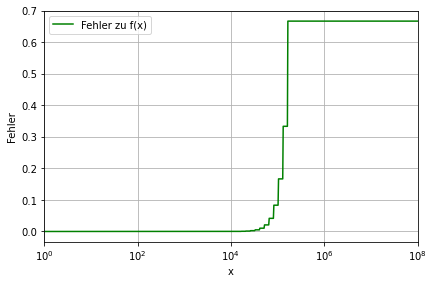

In [6]:
plt.plot(x, fehler_f, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

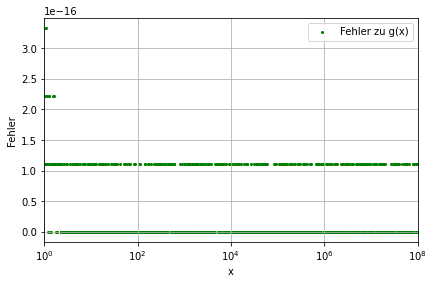

In [7]:
plt.scatter(x, fehler_g, c='green',label='Fehler zu g(x)',s=4)

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

Der Fehler alterniert zwischen $1.1102 \cdot 10^{-16}$ und $2.2205 \cdot 10^{-16}$.

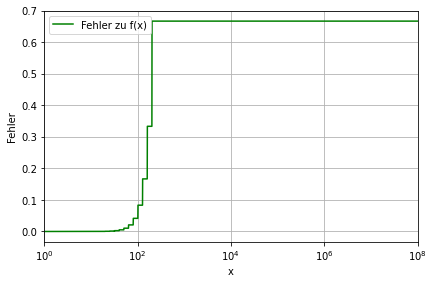

In [8]:
plt.plot(x_32, fehler_f_32, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

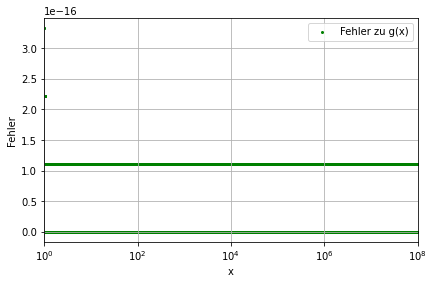

In [9]:
plt.scatter(x_32, fehler_g_32, c='green',label='Fehler zu g(x)', s=4)

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

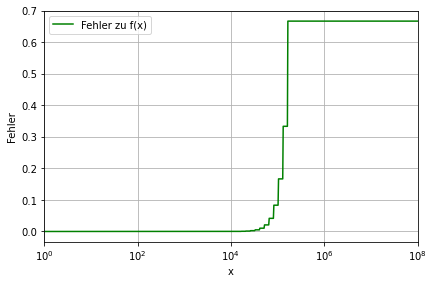

In [10]:
plt.plot(x_64, fehler_f_64, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

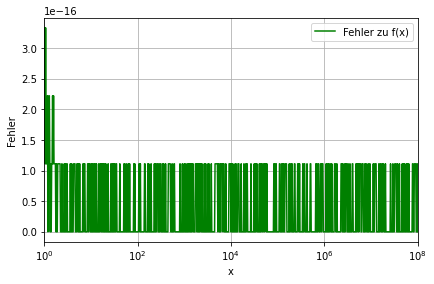

In [11]:
plt.plot(x_64, fehler_g_64, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()